In [4]:
pc = "MPIA"

In [5]:
import sys

if pc == "MPIA":
    sys.path.insert(0, '/home/milanov/Documents/mge/mge')
    sys.path.insert(0, '/home/milanov/Documents/Project/GC_actions/')

else:
    sys.path.insert(0, '/home/sophia/Dokumente/Sophia_Uni/Bachelor/Bachelorarbeit/mge/')
    sys.path.insert(0, '/home/sophia/Dokumente/Sophia_Uni/Bachelor/Bachelorarbeit/bachelor_thesis_ipython_notebooks/')

import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as cs
from astropy import units as un
from scipy.optimize import curve_fit
import scipy.integrate as intg

import mge_fit_1d
from Paolo_class import GCphasespace
from MGE_potential import MGE_potential
from GC_Orbit_class import GCorbit


%matplotlib inline

In [6]:
if pc == "MPIA":
    
    r_3d_1, m1_1, m2_1 = np.loadtxt('/home/milanov/Documents/Project/data_newpc/x-y-z_IMBH1.dat', 
                                    usecols = (1,9,10), unpack = True)
    r_3d_2, m1_2, m2_2 = np.loadtxt('/home/milanov/Documents/Project/data_newpc/x-y-z_IMBH2.dat', 
                                    usecols = (1,9,10), unpack = True)
    r_3d_wo_1, m1_wo_1, m2_wo_1 =np.loadtxt('/home/milanov/Documents/Project/data_newpc/x-y-z_noIMBH1.dat', 
                                            usecols=(1,9,10), unpack=True)
    r_3d_wo_2, m1_wo_2, m2_wo_2 =np.loadtxt('/home/milanov/Documents/Project/data_newpc/x-y-z_noIMBH2.dat', 
                                            usecols=(1,9,10), unpack=True)

    
else: 
    r_3d_1, m1_1, m2_1 = np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z_IMBH1.dat', 
                                    usecols = (1,9,10), unpack = True)
    r_3d_2, m1_2, m2_2 = np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z_IMBH2.dat', 
                                    usecols = (1,9,10), unpack = True)
    r_3d_wo_1, m1_wo_1, m2_wo_1 =np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z_noIMBH1.dat', 
                                            usecols=(1,9,10), unpack=True)
    r_3d_wo_2, m1_wo_2, m2_wo_2 =np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z_noIMBH2.dat', 
                                            usecols=(1,9,10), unpack=True)

r1, rho1 = np.loadtxt('interim_results/densityfile_IMBH1.txt')
r2, rho2 = np.loadtxt('interim_results/densityfile_IMBH2.txt')
r1_wo, rho1_wo = np.loadtxt('interim_results/densityfile_noIMBH1.txt')
r2_wo, rho2_wo = np.loadtxt('interim_results/densityfile_noIMBH2.txt')


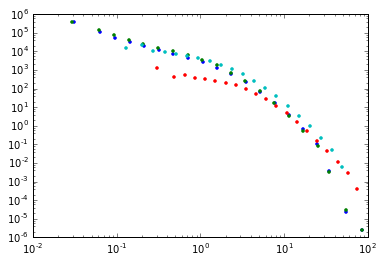

In [7]:
plt.loglog(r1, rho1, '.')
plt.loglog(r2, rho2, '.')
plt.loglog(r1_wo, rho1_wo, '.')
plt.loglog(r2_wo, rho2_wo, '.')

Iteration:  1   chi2: 3.662  Nonzero: 9
Iteration:  11   chi2: 2.014  Nonzero: 10
Iteration:  21   chi2: 2.011  Nonzero: 10
Iteration:  25   chi2: 2.005  Nonzero: 10
############################################
 Computation time: 0.15 seconds
 Total Iterations:  25
Nonzero Gaussians:  10
 Unused Gaussians:  2
 Chi2: 2.005 
 STDEV: 0.3003
 MEANABSDEV: 0.1152
############################################
 Total_Counts      Sigma
############################################
   5.6572e+23    0.00316228
      20256.9      0.037712
       9535.2     0.0896163
      8030.21      0.207421
      5832.02      0.508698
      6425.89       1.04414
      3349.14       2.08952
      831.684       4.14869
      74.5659       8.72458
      17.5882            10
############################################


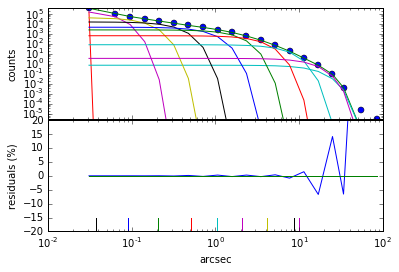

In [8]:
mge1 = mge_fit_1d.mge_fit_1d(r1, rho1, rbounds = (0.001, 10),  plot = 1) 

Iteration:  1   chi2: 3.323  Nonzero: 11
Iteration:  11   chi2: 1.999  Nonzero: 10
Iteration:  17   chi2: 1.998  Nonzero: 10
############################################
 Computation time: 0.12 seconds
 Total Iterations:  17
Nonzero Gaussians:  10
 Unused Gaussians:  2
 Chi2: 1.998 
 STDEV: 0.2999
 MEANABSDEV: 0.1084
############################################
 Total_Counts      Sigma
############################################
      33591.8     0.0183288
      22052.3     0.0509617
      10041.9      0.127981
      5749.85      0.222501
       9902.9      0.484438
       8802.9       1.02321
      3920.77       2.06439
      802.715       4.14855
       49.662       8.99004
       16.723            10
############################################


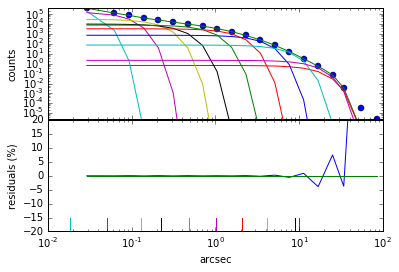

In [9]:
mge2 = mge_fit_1d.mge_fit_1d(r2, rho2, rbounds = (0.01, 10),  plot = 1) 

Iteration:  1   chi2: 2.7  Nonzero: 7
Iteration:  8   chi2: 1.879  Nonzero: 6
############################################
 Computation time: 0.04 seconds
 Total Iterations:  8
Nonzero Gaussians:  6
 Unused Gaussians:  6
 Chi2: 1.879 
 STDEV: 0.2918
 MEANABSDEV: 0.1415
############################################
 Total_Counts      Sigma
############################################
      22883.4           0.1
       460.83      0.915687
      953.104       1.94406
      642.882       3.54699
      208.715       6.65806
      23.0919            15
############################################


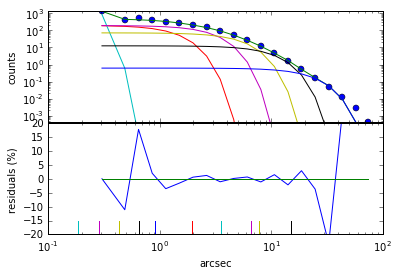

In [10]:
mge1_wo = mge_fit_1d.mge_fit_1d(r1_wo, rho1_wo, rbounds = (0.1, 15),  plot = 1) 

Iteration:  1   chi2: 1.003  Nonzero: 10
Iteration:  11   chi2: 0.1566  Nonzero: 9
Iteration:  15   chi2: 0.1563  Nonzero: 8
############################################
 Computation time: 0.10 seconds
 Total Iterations:  15
Nonzero Gaussians:  8
 Unused Gaussians:  4
 Chi2: 0.1563 
 STDEV: 0.08807
 MEANABSDEV: 0.04455
############################################
 Total_Counts      Sigma
############################################
      5760.99      0.194748
      4074.98      0.515001
      7689.65      0.949056
      5508.99       1.61876
      3440.83       2.43266
      1801.35       4.01052
       409.51       7.25105
      44.9536            15
############################################


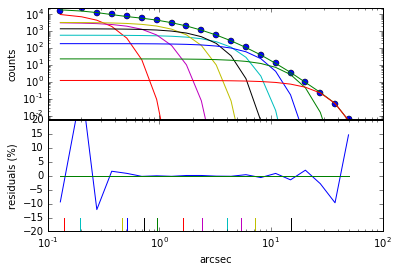

In [11]:
mge2_wo = mge_fit_1d.mge_fit_1d(r2_wo, rho2_wo, rbounds = (0.1, 15),  plot = 1) 

In [12]:
#counts, sigma = mge.sol

if 1:
    np.savetxt('MGE_Results/MGE_results_IMBH1', mge1.sol)
    np.savetxt('MGE_Results/MGE_results_IMBH2', mge2.sol)
    np.savetxt('MGE_Results/MGE_results_noIMBH1', mge1_wo.sol)
    np.savetxt('MGE_Results/MGE_results_noIMBH2', mge2_wo.sol)
    

According to Cappellari 2008 (16) + (17); vereinfacht:

$\Phi(R)= - \sqrt{2 / \pi} G \int_0^1{\sum_{j=1}^M{\frac{M_j \mathcal{H}_j(u)}{\sigma_j} \mathrm{d}u}}$


$\mathcal{H}_j(u) =\mathrm{exp}\left(-\frac{u^2 R^2}{2 \sigma_j^2}\right) \qquad$  

Potential of BH has to be added (18).

In [13]:
MGE1 = MGE_orbit(inputfilename = 'MGE_Results/MGE_results_IMBH1', M_BH = m1_1[0] + m2_1[0]) 
MGE2 = MGE_orbit(inputfilename = 'MGE_Results/MGE_results_IMBH2', M_BH = m1_2[0] + m2_2[0]) 
MGE1_wo = MGE_orbit(inputfilename = 'MGE_Results/MGE_results_noIMBH1') 
MGE2_wo = MGE_orbit(inputfilename = 'MGE_Results/MGE_results_noIMBH2') 

In [15]:
n = 1000
R = np.logspace(-3, 2, n)
pot1 = np.zeros(n)
pot2 = np.zeros(n)
pot1_wo = np.zeros(n)
pot2_wo = np.zeros(n)
for i in range(n):
    pot1[i] = MGE1.potential(R[i])
    pot2[i] = MGE2.potential(R[i])
    pot1_wo[i] = MGE1_wo.potential(R[i])
    pot2_wo[i] = MGE2_wo.potential(R[i])

/usr/lib64/python2.7/site-packages/scipy/integrate/quadpack.py:352: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)


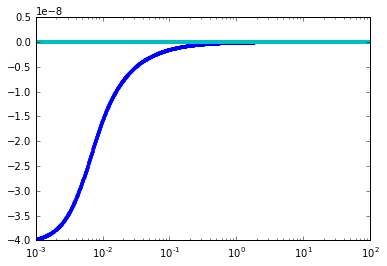

In [16]:
plt.semilogx(R, pot1, '.')
plt.semilogx(R, pot2, '.')
plt.semilogx(R, pot1_wo, '.')
plt.semilogx(R, pot2_wo, '.')


In [17]:
bh_orbit_1 = GCorbit(inputfilename = 'interim_results/densityfile_IMBH1.txt', bhmass_M_sun = m1_1[0] + m2_1[0])
bh_orbit_2 = GCorbit(inputfilename = 'interim_results/densityfile_IMBH2.txt', bhmass_M_sun = m1_2[0] + m2_2[0])
wobh_orbit_1 = GCorbit(inputfilename = 'interim_results/densityfile_noIMBH1.txt')
wobh_orbit_2 = GCorbit(inputfilename = 'interim_results/densityfile_noIMBH2.txt')

/home/milanov/Documents/Project/GC_actions/GC_Orbit_class.py:68: RuntimeWarning: overflow encountered in exp
  density= np.exp(self.s(np.log(r)))


In [18]:
pot_bh_1 = bh_orbit_1.potential(r_3d_1[1:])
pot_bh_2 = bh_orbit_2.potential(r_3d_2[1:])
pot_wobh_1 = wobh_orbit_1.potential(r_3d_wo_1)
pot_wobh_2 = wobh_orbit_2.potential(r_3d_wo_2)


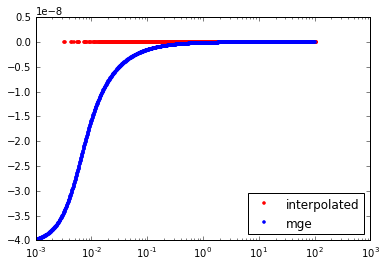

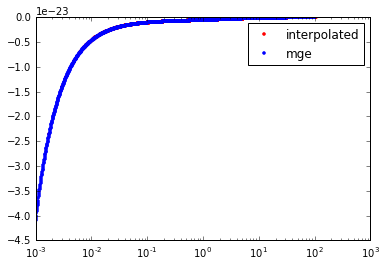

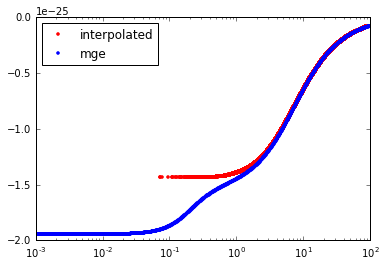

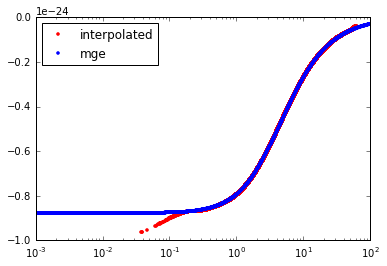

In [19]:
plt.semilogx(r_3d_1[1:], pot_bh_1, 'r.', label = 'interpolated')
plt.semilogx(R, pot1, 'b.', label ='mge')
plt.legend(loc = 0, numpoints = 1)
plt.show()

plt.semilogx(r_3d_2[1:], pot_bh_2, 'r.', label = 'interpolated')
plt.semilogx(R, pot2, 'b.', label ='mge')
plt.legend(loc = 0, numpoints = 1)
plt.show()

plt.semilogx(r_3d_wo_1, pot_wobh_1, 'r.', label = 'interpolated')
plt.semilogx(R, pot1_wo, 'b.', label ='mge')
plt.legend(loc = 0, numpoints = 1)
plt.show()

plt.semilogx(r_3d_wo_2, pot_wobh_2, 'r.', label = 'interpolated')
plt.semilogx(R, pot2_wo, 'b.', label ='mge')
plt.legend(loc = 0, numpoints = 1)
plt.show()
